# Lab 9 Alireza Farajtabrizi 97102185

## Importing Libraries

In [2]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

from sklearn.svm import SVC
from sklearn import  metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Part 1 & 2

In [3]:
videos = []
labels = []

folder_dir = 'handclapping'
i = 1
print('handclapping :')

for file in os.listdir(folder_dir):
    cap = cv2.VideoCapture(os.path.join(folder_dir,file))
    video_features = []
    
    j = 0
    if (cap.isOpened()== False):
        print("Error opening video file")
    while(cap.isOpened()):
        feature = []
        ret, frame = cap.read()
        
        if ret == True:
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            if j !=0:
                opf = cv2.calcOpticalFlowFarneback(frame_gray, old_fram, None,
                                                   0.5, 1, 20, 1, 5, 1.2, cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
                # downsampling by 10*10 on optical flows
                for h in range(120):
                        if h % 10 != 0:
                            continue
                        for w in range(160):
                            if w % 10 != 0:
                                continue
                            feature.append(opf[h,w,0])
                            feature.append(opf[h,w,1])
                            
                video_features.append(feature)
            j+=1
        else:
            break
        old_fram = frame_gray 
        
    i+=1
    if (i%20==0):
        print(f'{i}% of Video features extraced')     
    videos.append(video_features)
    labels.append(0)
    cap.release()

###############################################################################################################
folder_dir = 'handwaving'
i = 0
print('handwaving :')

for file in os.listdir(folder_dir):
    cap = cv2.VideoCapture(os.path.join(folder_dir,file))
    video_features = []
    
    j = 0
    if (cap.isOpened()== False):
        print("Error opening video file")
    while(cap.isOpened()):
        feature = []
        ret, frame = cap.read()
        
        if ret == True:
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            if j !=0:
                opf = cv2.calcOpticalFlowFarneback(frame_gray, old_fram, None,
                                                   0.5, 1, 20, 1, 5, 1.2, cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
                # downsampling by 10*10 on optical flows
                for h in range(120):
                        if h % 10 != 0:
                            continue
                        for w in range(160):
                            if w % 10 != 0:
                                continue
                            feature.append(opf[h,w,0])
                            feature.append(opf[h,w,1])
                            
                video_features.append(feature)           
            j+=1
        else:
            break
        old_fram = frame_gray

    i+=1
    if (i%20==0):
        print(f'{i}% of Video features extraced')     
    videos.append(video_features)
    labels.append(1)
    cap.release()
    
###############################################################################################################
folder_dir = 'running'
i = 0
print('running :')

for file in os.listdir(folder_dir):
    cap = cv2.VideoCapture(os.path.join(folder_dir,file))
    video_features = []
    
    j = 0
    if (cap.isOpened()== False):
        print("Error opening video file")
    while(cap.isOpened()):
        feature = []
        ret, frame = cap.read()
        
        if ret == True:
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

            if j !=0:
                opf = cv2.calcOpticalFlowFarneback(frame_gray, old_fram, None,
                                                   0.5, 1, 20, 1, 5, 1.2, cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
                # downsampling by 10*10 on optical flows
                for h in range(120):
                        if h % 10 != 0:
                            continue
                        for w in range(160):
                            if w % 10 != 0:
                                continue
                            feature.append(opf[h,w,0])
                            feature.append(opf[h,w,1])
                            
                video_features.append(feature)
            j+=1
        else:
            break
        old_fram = frame_gray
        
    i+=1
    if (i%20==0):
        print(f'{i}% of Video features extraced')     
    videos.append(video_features)
    labels.append(2)
    cap.release()
    

handclapping :
20% of Video features extraced
40% of Video features extraced
60% of Video features extraced
80% of Video features extraced
100% of Video features extraced
handwaving :
20% of Video features extraced
40% of Video features extraced
60% of Video features extraced
80% of Video features extraced
100% of Video features extraced
running :
20% of Video features extraced
40% of Video features extraced
60% of Video features extraced
80% of Video features extraced
100% of Video features extraced


## Part 3

### Spliting Data

چون تعداد فریم های ویدئو ها متفاوت است نمی توان با داده به صورت آرایه کار کرد و باید به فرم لیست از آن استفاده کرد. در نتیجه برای جدا کردن رندم ایندکس ها به صورت رندم تولید شده اند و از لیست فراخوانی شده اند.

In [4]:
index = random.sample(range(len(videos)),int(0.8*len(videos)))
train = []
y_train = []
test = []
y_test = []

for i in index:
    train.append(videos[i])
    y_train.append(labels[i])
    
for i in list(set(range(len(videos)))-set(index)):
    test.append(videos[i])
    y_test.append(labels[i])

### Training K-Means Clusters

در این بخش فقط با استفاده از دادگان آموزش خوشه بندی ها در سه حالت انجام می شود

In [5]:
# Extractin Trainset Features
all_features = []
for i in range(len(train)):
    for j in range(len(train[i])):
        all_features.append(train[i][j])
        
print('180 cluster started')       
cluster_num = 180
kmeans180 = KMeans(init='k-means++', n_clusters=cluster_num, n_init=5)
kmeans180.fit(all_features)

print('200 cluster started') 
cluster_num = 200
kmeans200 = KMeans(init='k-means++', n_clusters=cluster_num, n_init=5)
kmeans200.fit(all_features)

print('220 cluster started') 
cluster_num = 220
kmeans220 = KMeans(init='k-means++', n_clusters=cluster_num, n_init=5)
kmeans220.fit(all_features)

180 cluster started
200 cluster started
220 cluster started


KMeans(n_clusters=220, n_init=5)

### BoW Extraction

در این بخش برای هر فیلم بردار ویژگی آن که تعداد بعدی برابر با تعداد خوشه ها دارد تشکیل و نورمالایز می شود

In [6]:
kmeans = kmeans180
cluster_num =180
x_train = np.zeros((len(train), cluster_num))

for i in range(len(train)):
    a = kmeans.predict(train[i])
    for j in range(len(train[i])):
      x_train[i][a[j]] += 1 
    x_train[i]/= len(train[i]) 

clf = SVC()
clf.fit(x_train,y_train)

y_pred_train = clf.predict(x_train)
print('Train Accuracy:', accuracy_score(y_pred_train,y_train))


Train Accuracy: 0.9707112970711297


## Part 4 (Test and Evaluation)

### Best Cluster Count

In [52]:
params = [(kmeans180,180), (kmeans200,200), (kmeans220,220)]
best_acu = 0

for kmean, cluster_num in params:
  
  x_train = np.zeros((len(train),cluster_num))
  for i in range(len(train)):
      a = kmean.predict(train[i])
      for j in range(len(train[i])):
        x_train[i][a[j]] += 1 
      x_train[i]/= len(train[i]) 
    
  x_test = np.zeros((len(test),cluster_num))
  for i in range(len(test)):
      a = kmean.predict(test[i])
      for j in range(len(test[i])):
        x_test[i][a[j]] += 1 
      x_test[i]/= len(test[i]) 

  clf = SVC()
  clf.fit(x_train,y_train)

  y_pred_train = clf.predict(x_train)
  y_pred_test = clf.predict(x_test)
  print('Cluster Number :',cluster_num)
  print('Train Accuracy :', accuracy_score(y_pred_train,y_train))
  print('Test Accuracy :', accuracy_score(y_pred_test,y_test))
  
  
  if accuracy_score(y_pred_test,y_test)>best_acu:
    best_acu = accuracy_score(y_pred_test,y_test)
    best_cln = (kmean,cluster_num)
    


Cluster Number : 180
Train Accuracy : 0.9707112970711297
Test Accuracy : 0.9833333333333333
Cluster Number : 200
Train Accuracy : 0.9790794979079498
Test Accuracy : 0.9666666666666667
Cluster Number : 220
Train Accuracy : 0.9748953974895398
Test Accuracy : 0.9666666666666667


بهترین تعداد کلاستر کمی متغیر است و بستگی به جداسازی رندوم داده های آموزش دارد اما معمولا 180 عدد خوبی است

### Tuning Model (Grid Search)

The best parameters are {'C': 1000.0, 'gamma': 1e-10, 'kernel': 'linear'} with a score of 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        81

    accuracy                           1.00       239
   macro avg       1.00      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



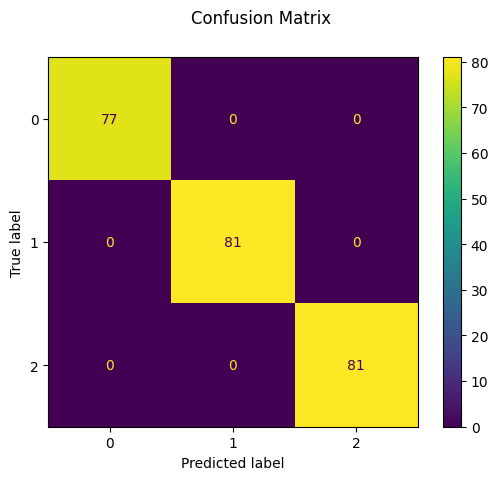

In [54]:
# fitting on best cluster
kmeans = best_cln[0]
cluster_num = best_cln[1]
x_train = np.zeros((len(train),cluster_num))

for i in range(len(train)):
    a = kmeans.predict(train[i])
    for j in range(len(train[i])):
      x_train[i][a[j]] += 1 
    x_train[i]/= len(train[i]) 
    
# Grid Search   
svc = SVC()
kernels = ['rbf', 'linear']
C_range = np.logspace(-10, 10, 21)
gamma_range = np.logspace(-10, 10, 21)

param_grid = dict(kernel=kernels, gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(x_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)


# Building Model
C, gamma, kernel = grid.best_params_['C'], grid.best_params_['gamma'], grid.best_params_['kernel']
clf = SVC(kernel = kernel, C=C, gamma=gamma)
clf.fit(x_train, y_train)

# Evaluating Model
y_pred_train = clf.predict(x_train)
print(classification_report(y_train, y_pred_train))

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

### Test Evaluation

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        19

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



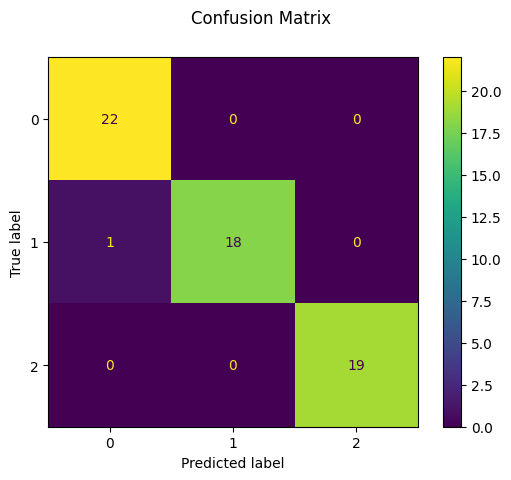

In [59]:
x_test = np.zeros((len(test),cluster_num))

for i in range(len(test)):
    a = kmeans.predict(test[i])
    for j in range(len(test[i])):
      x_test[i][a[j]] += 1 
    x_test[i]/= len(test[i]) 
    
y_pred_test = clf.predict(x_test)
print(classification_report(y_test, y_pred_test))

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Part 5 Live 

In [58]:
cap = cv2.VideoCapture(0)
video_features = []
i=0

while(cap.isOpened()):
    ret, frame = cap.read() 
    cv2.imshow('Webcam', frame)
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    feature = []
    
    if ret == True:
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frame_gray = cv2.resize(frame_gray,(160,120), interpolation = cv2.INTER_AREA)

            if i!=0:
                opf = cv2.calcOpticalFlowFarneback(frame_gray, old_fram, None,
                                                   0.5, 1, 20, 1, 5, 1.2, cv2.OPTFLOW_FARNEBACK_GAUSSIAN)
                for h in range(120):
                        if h % 10 != 0:
                            continue
                        for w in range(160):
                            if w % 10 != 0:
                                continue
                            feature.append(opf[h,w,0])
                            feature.append(opf[h,w,1])
                            
                video_features.append(feature)
            i+=1 
    else:
        break
    old_fram = frame_gray 
    
    if i%100 == 99:
        x_live = np.zeros((1,cluster_num))
        a = kmeans.predict(video_features)
        print()
        for k in range(len(video_features)):
                x_live[0][a[k]] += 1   
        x_live[0]/= len(video_features) 
        print(clf.predict(x_live))
        video_features = []
        i=0

    # Wait for 'q' key to stop the program 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
# Close the window / Release webcam
cap.release()
cv2.destroyAllWindows()


[2]

[2]


کد این بخش به درستی نوشته شده اما شاید به دلیل تفاوتی که با تصویر برداری دیتاست دارد از لحاظ پس زمینه و نور و فاصله شخص از دوربین نتایج خوب نیستند